In [0]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()
import numpy as np

In [0]:
tf.__version__

'1.13.1'

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
x=mnist.data
y=mnist.target

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
#x_train_1,x_valid,y_train_1,y_valid=train_test_split(x_train,y_train,test_size=0.2)

In [0]:
"""fashion_mnist=keras.datasets.fashion_mnist#here we have take handwriiten digit data
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()# we have taken fashion mnist vdataset"""

In [0]:
fashion_mnist=keras.datasets.fashion_mnist#it is fashion data set any datset you can use to fit
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [0]:
x_train_full.shape

(60000, 28, 28)

In [0]:
x_train_full.dtype

dtype('uint8')

In [0]:
x_valid,x_train=x_train[:5000]/255.0,x_train[5000:]/255.0# here we have divided first 5000 instances and next 5000 instances by 255(there are 256 pixels) becoz we need to make change the image shape to  two dimensional 
y_valid,y_train=y_train[:5000],y_train[5000:]

In [0]:
#x_valid and y_valid is the test set and x_train and y_train is the train set we have actually split the dataset

In [0]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [0]:
class_names[y_train[5001]]

'Sneaker'

In [0]:

class_names[y_valid[500]]

'Dress'

In [0]:
model=keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28,28]))#here we have flattened the data and converted the iamge into 784 features
model.add(keras.layers.Dense(300,activation="elu",input_shape=(784,),kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10,activation="softmax"))





In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers

In [0]:
model.layers[1].name

'dense_7'

In [0]:
model.get_layer('dense_7').name

'dense_7'

In [0]:
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()

In [0]:
weights

array([[ 0.04529044,  0.05996623,  0.07671394, ...,  0.07019726,
        -0.05293593, -0.0287435 ],
       [ 0.0681095 , -0.07911704, -0.06382905, ..., -0.00797155,
        -0.00538054,  0.04518665],
       [ 0.0122007 ,  0.05270166, -0.03383149, ..., -0.13716988,
        -0.06597926,  0.06099069],
       ...,
       [ 0.07989542, -0.03356872, -0.02515422, ..., -0.04989338,
         0.05975406, -0.0357126 ],
       [ 0.12574942,  0.00897474, -0.03184175, ..., -0.08981844,
        -0.09727904, -0.0835239 ],
       [-0.05792268,  0.03414261, -0.06127099, ..., -0.09407625,
        -0.03362002,  0.01656308]], dtype=float32)

In [0]:
weights.shape

(300, 100)

In [0]:

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
biases.shape

(100,)

In [0]:

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [0]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))#we can use the this history syntax or this down one  to fit and validate(predict)

Train on 51000 samples, validate on 5000 samples
Epoch 1/30
51000/51000 [==============================] - 6s 117us/sample - loss: 0.4991 - acc: 0.8632 - val_loss: 0.3315 - val_acc: 0.9068
Epoch 2/30
51000/51000 [==============================] - 6s 113us/sample - loss: 0.3012 - acc: 0.9140 - val_loss: 0.2924 - val_acc: 0.9162
Epoch 3/30
51000/51000 [==============================] - 6s 110us/sample - loss: 0.2647 - acc: 0.9240 - val_loss: 0.2668 - val_acc: 0.9244
Epoch 4/30
51000/51000 [==============================] - 6s 111us/sample - loss: 0.2384 - acc: 0.9317 - val_loss: 0.2452 - val_acc: 0.9322
Epoch 5/30
51000/51000 [==============================] - 5s 108us/sample - loss: 0.2157 - acc: 0.9394 - val_loss: 0.2271 - val_acc: 0.9354
Epoch 6/30
51000/51000 [==============================] - 6s 111us/sample - loss: 0.1962 - acc: 0.9444 - val_loss: 0.2095 - val_acc: 0.9416
Epoch 7/30
51000/51000 [==============================] - 6s 117us/sample - loss: 0.1786 - acc: 0.9493 - val_lo

In [0]:
history=model.fit(x_train_full/255.0,y_train_full,epochs=30,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0323 - acc: 0.9923 - val_loss: 0.0262 - val_acc: 0.9950
Epoch 2/30
54000/54000 [==============================] - 6s 111us/sample - loss: 0.0301 - acc: 0.9927 - val_loss: 0.0255 - val_acc: 0.9945
Epoch 3/30
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0281 - acc: 0.9933 - val_loss: 0.0264 - val_acc: 0.9945
Epoch 4/30
54000/54000 [==============================] - 6s 112us/sample - loss: 0.0263 - acc: 0.9941 - val_loss: 0.0272 - val_acc: 0.9937
Epoch 5/30
54000/54000 [==============================] - 6s 111us/sample - loss: 0.0247 - acc: 0.9947 - val_loss: 0.0286 - val_acc: 0.9927
Epoch 6/30
54000/54000 [==============================] - 6s 111us/sample - loss: 0.0233 - acc: 0.9952 - val_loss: 0.0280 - val_acc: 0.9923
Epoch 7/30
54000/54000 [==============================] - 6s 111us/sample - loss: 0.0221 - acc: 0.9956 - val_lo

In [0]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 54000,
 'steps': None,
 'verbose': 0}

In [0]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

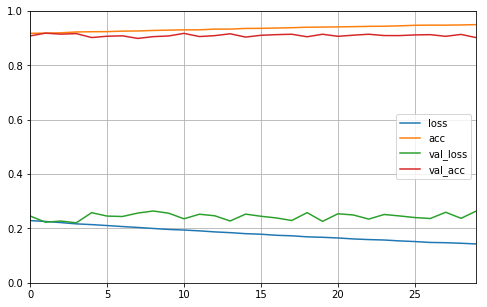

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)# set the vertical range to [0-1]
plt.show()

In [0]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 2.6884 - acc: 0.8314


[2.688395870780945, 0.8314]

In [0]:
x_new=x_test[:3]
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
model.predict_classes(x_new)

array([9, 2, 1])